In [126]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [146]:
import cluster
import super_sort as ssort
from generate_test_data import generate_nested_data

In [147]:
def add_cuts(ax, cuts, N):
    cuts.append(N)
    print(len(cuts))
    c_last = 0
    for c in cuts:
        color = 'k'
        ax.plot([c, c], [c, c_last], color)
        ax.plot([c, c_last], [c, c], color)
        ax.plot([c, c_last], [c_last, c_last], color)
        ax.plot([c_last, c_last], [c, c_last], color)
        c_last = c
    

def mplot(a, title=None, boxes=None):
    cmap = 'spectral'
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pcolor(a, vmin=0.1, vmax=0.8, cmap=cmap)
    N = len(a)
    if boxes is not None:
        add_cuts(ax, cuts=boxes, N=N)
    ax.set_xlim([0, N])
    ax.set_ylim([0, N])
    if title is not None:
        ax.set_title(title, size=20)
    plt.show()

# Generate Test Data

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


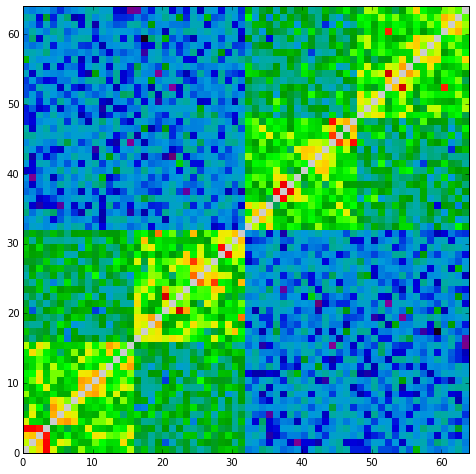

In [148]:
test_solution = generate_nested_data() #noise=None)
mplot(test_solution)

# Shuffle Matrix Order

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


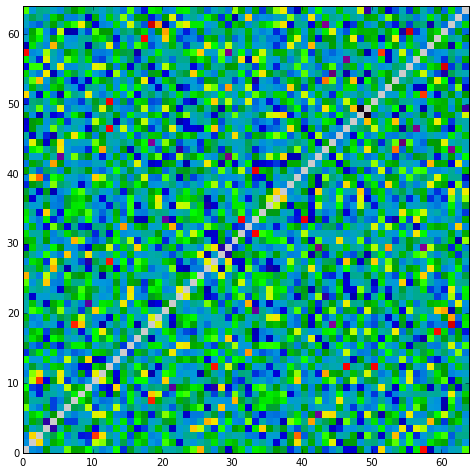

In [149]:
n = len(test_solution)
order = np.arange(n)
random.shuffle(order)
test = test_solution[:, order][order, :]

mplot(test)

# Run Reorder

In [132]:
# temperature
# fraction moved
# best fitness
# 1000 * last move ... (?)
# evals - last move
# steps * finishing criterion

In [133]:
# reorder using simulated annealing
sas = ssort.SASort(test)
ds_result, ds_order = sas()

#reorder using heirarchical clustering
hcs = ssort.HierarchicalClustering(test)
hc_result, hc_order = hcs()

0.001 0.8173076923076923 1093.61961735 818.0 0 104
0.000904792147113709 0.5480769230769231 1096.57809858 549.0 0 104
0.0008186488294786356 0.5384615384615384 1107.17629029 539.0 0 104
0.0007407070321560992 0.5288461538461539 1107.17629029 529.0 0 104
0.0006701859060067401 0.4519230769230769 1107.17629029 452.0 3 104
0.0006063789448611847 0.4326923076923077 1107.24397698 433.0 2 104
0.0005486469074854967 0.5961538461538461 1107.24397698 597.0 0 104
0.0004964114134310989 0.5192307692307693 1108.05137975 520.0 0 104
0.000449149148610075 0.5096153846153846 1114.41827223 510.0 0 104
0.0004063866225452041 0.4230769230769231 1114.41827223 424.0 1 104
0.0003676954247709636 0.5096153846153846 1116.38877553 510.0 0 104
0.0003326879328624074 0.4423076923076923 1119.91715841 443.0 1 104
0.00030101342909339904 0.40384615384615385 1121.14950295 404.0 1 104
0.0002723545868194767 0.49038461538461536 1122.77034551 491.0 0 104
0.0002464242913846614 0.3557692307692308 1124.217172 356.0 1 104
0.0002229627

In [134]:
print('result = reordered array')
print(type(ds_result))
print(ds_result.shape)

print()

print('order = new order of array in terms of initial indicies')
print(type(ds_order))
print(ds_order)

result = reordered array
<class 'numpy.ndarray'>
(64, 64)

order = new order of array in terms of initial indicies
<class 'numpy.ndarray'>
[62 41 60  8 55 47 24 18 59  9 37 44 28  7 25 14  1 20 26 29 61 30 32 56 17
 36  0 15 38  5 12 63 33 46 16 39 52 19 43  4 35 11 23  6 27  2 13 57 31 50
  3 40 48 58 34 49 51 42 53 22 21 45 54 10]


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


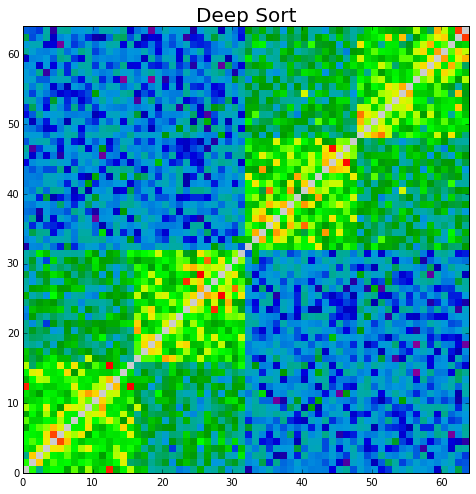

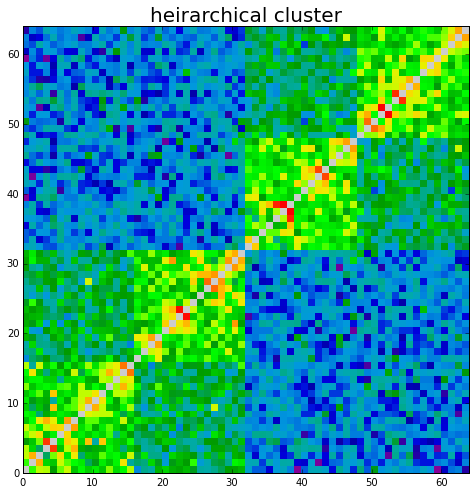

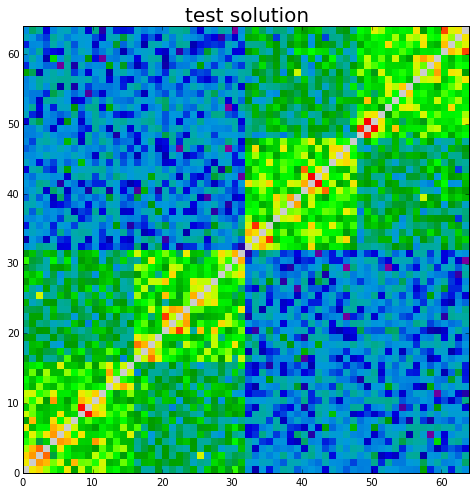

In [135]:
mplot(ds_result, title='Deep Sort')

mplot(hc_result, title='heirarchical cluster')

mplot(test_solution, title='test solution')

5


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


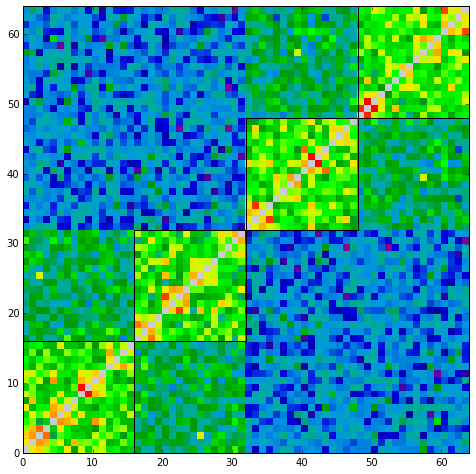

In [145]:
bc = cluster.BoxClustering(ds_result)
best_boxes, best_boxes_fitness = bc.fit_boxes()
mplot(test_solution, boxes=best_boxes)